In [67]:
# Importing library
import numpy as np
import pandas as pd

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from sklearn.datasets import make_moons
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# https://www.geeksforgeeks.org/k-nearest-neighbor-algorithm-in-python/
# https://plotly.com/python/knn-classification/
# https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/
# https://mljar.com/blog/visualize-decision-tree/
# https://www.geeksforgeeks.org/decision-tree-implementation-python/

In [2]:
# Upload file
from google.colab import files
uploaded = files.upload()

Saving water_potability.csv to water_potability.csv


In [33]:
# Access csv file
import io
df = pd.read_csv(io.BytesIO(uploaded['water_potability.csv']))

In [34]:
# drop all rows that have NaN/None values
clean_data=df.dropna()

In [35]:
# Visualize results
clean_data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0


In [36]:
# Let’s now take a look at the number of instances (rows) that belong to each class. We can view this as an absolute count.
clean_data.groupby('Potability').size()

Potability
0    1200
1     811
dtype: int64

In [102]:
#Create feature and target arrays
feature_columns=['ph', 'Hardness','Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes','Turbidity']
X = clean_data[feature_columns].values
#X = clean_data.iloc[:, :2]
y = clean_data["Potability"].values

In [103]:
# Print the unique labels of the dataset
print('\n' + 'The unique labels in this data are ' + str(np.unique(y)))


The unique labels in this data are [0 1]


In [104]:
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(
             X, y, test_size = 0.2, random_state=0)

print('There are {} samples in the training set and {} samples in the test set'.format(
X_train.shape[0], X_test.shape[0]))
print()

There are 1608 samples in the training set and 403 samples in the test set



In [105]:
# Fitting model on the training and test dataset
knn = KNeighborsClassifier(n_neighbors=4, p=2, metric='minkowski')
knn.fit(X_train, y_train)

print('The accuracy of the knn classifier is {:.2f} out of 1 on training data'.format(knn.score(X_train, y_train)))
print('The accuracy of the knn classifier is {:.2f} out of 1 on test data'.format(knn.score(X_test, y_test)))

The accuracy of the knn classifier is 0.71 out of 1 on training data
The accuracy of the knn classifier is 0.62 out of 1 on test data


In [106]:
# Predict on dataset which model has not seen before
test_preds = knn.predict(X_test)
print(test_preds)

[0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1
 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0
 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0
 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0
 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 0 0 0]


**KNN:Deciding the right k-value for the dataset**

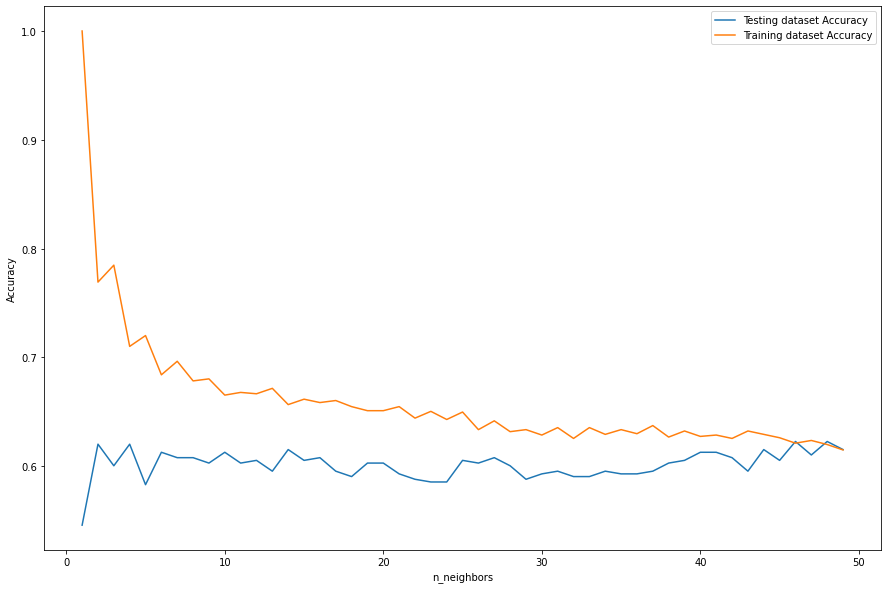

In [109]:
# Split into training and test set
neighbors = np.arange(1, 50)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
      
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
  
# Generate plot
fig = plt.figure(figsize=(15,10))
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
#plt.axis([45, 50, 0.6, 0.7])
plt.show()

**PLOT**

**PLOT 1**

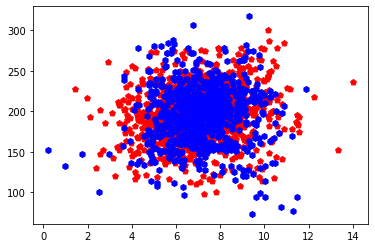

In [24]:
markers = ('p', 'h', 's','c','u','o','r','t','b')
colors = ('red', 'blue', 'lightgreen','orange','yellow','pink','green','lighblue')
cmap = ListedColormap(colors[:len(np.unique(y_test))])
for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
               c=cmap(idx), marker=markers[idx], label=cl)

**Plotting the Fit of the Model**

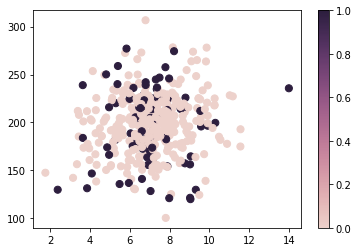

In [25]:
import seaborn as sns
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(X_test[:, 0], X_test[:, 1], c=test_preds, s=50, cmap=cmap)
f.colorbar(points)
plt.show()

Confirming whether the trend in the figure above exists in actual data

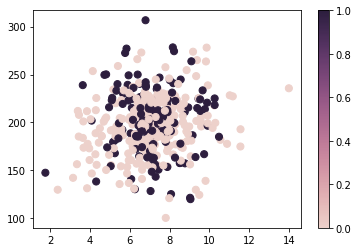

In [26]:
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50, cmap=cmap)
f.colorbar(points)
plt.show()

**PLOT 2**

In [42]:
import plotly.graph_objects as go
from sklearn.datasets import make_moons


# Load and split data
X, y = make_moons(noise=0.3, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(
    X, y.astype(str), test_size=0.2, random_state=0)

#X_train, X_test, y_train, y_test = train_test_split(
             #X, y, test_size = 0.2, random_state=0)

trace_specs = [
    [X_train, y_train, '0', 'Train', 'square'],
    [X_train, y_train, '1', 'Train', 'circle'],
    [X_test, y_test, '0', 'Test', 'square-dot'],
    [X_test, y_test, '1', 'Test', 'circle-dot']
]

fig = go.Figure(data=[
    go.Scatter(
        x=X[y==label, 0], y=X[y==label, 1],
        name=f'{split} Split, Label {label}',
        mode='markers', marker_symbol=marker
    )
    for X, y, label, split, marker in trace_specs
])
fig.update_traces(
    marker_size=12, marker_line_width=1.5,
    marker_color="lightgreen"
)
fig.show()

Visualize predictions on test split

In [43]:
import plotly.express as px

# Fit the model on training data, predict on test data
knn.fit(X_train, y_train)
y_score = knn.predict_proba(X_test)[:,1]

fig = px.scatter(
    X_test, x=0, y=1,
    color=y_score, color_continuous_scale='RdBu',
    symbol=y_test, symbol_map={'0': 'square-dot', '1': 'circle-dot'},
    labels={'symbol': 'label', 'color': 'score of <br>first class'}
)
fig.update_traces(marker_size=12, marker_line_width=1.5)
fig.update_layout(legend_orientation='h')
fig.show()

Probability Estimates

In [44]:
mesh_size = .02
margin = 0.25

# Create a mesh grid on which we will run our model
x_min, x_max = X[:, 0].min() - margin, X[:, 0].max() + margin
y_min, y_max = X[:, 1].min() - margin, X[:, 1].max() + margin
xrange = np.arange(x_min, x_max, mesh_size)
yrange = np.arange(y_min, y_max, mesh_size)
xx, yy = np.meshgrid(xrange, yrange)

# Create classifier, run predictions on grid
knn.fit(X, y)
Z = knn.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)


# Plot the figure
fig = go.Figure(data=[
    go.Contour(
        x=xrange,
        y=yrange,
        z=Z,
        colorscale='RdBu'
    )
])
fig.show()

Compare the confidence of our model with the true labels.

In [45]:
mesh_size = .02
margin = 0.25

# Load and split data
X, y = make_moons(noise=0.3, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(
    X, y.astype(str), test_size=0.2, random_state=0)

# Create a mesh grid on which we will run our model
x_min, x_max = X[:, 0].min() - margin, X[:, 0].max() + margin
y_min, y_max = X[:, 1].min() - margin, X[:, 1].max() + margin
xrange = np.arange(x_min, x_max, mesh_size)
yrange = np.arange(y_min, y_max, mesh_size)
xx, yy = np.meshgrid(xrange, yrange)

# Create classifier, run predictions on grid
knn.fit(X, y)
Z = knn.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

trace_specs = [
    [X_train, y_train, '0', 'Train', 'square'],
    [X_train, y_train, '1', 'Train', 'circle'],
    [X_test, y_test, '0', 'Test', 'square-dot'],
    [X_test, y_test, '1', 'Test', 'circle-dot']
]

fig = go.Figure(data=[
    go.Scatter(
        x=X[y==label, 0], y=X[y==label, 1],
        name=f'{split} Split, Label {label}',
        mode='markers', marker_symbol=marker
    )
    for X, y, label, split, marker in trace_specs
])
fig.update_traces(
    marker_size=12, marker_line_width=1.5,
    marker_color="lightyellow"
)

fig.add_trace(
    go.Contour(
        x=xrange,
        y=yrange,
        z=Z,
        showscale=False,
        colorscale='RdBu',
        opacity=0.4,
        name='Score',
        hoverinfo='skip'
    )
)
fig.show()

# Visualising the Training set results (2)

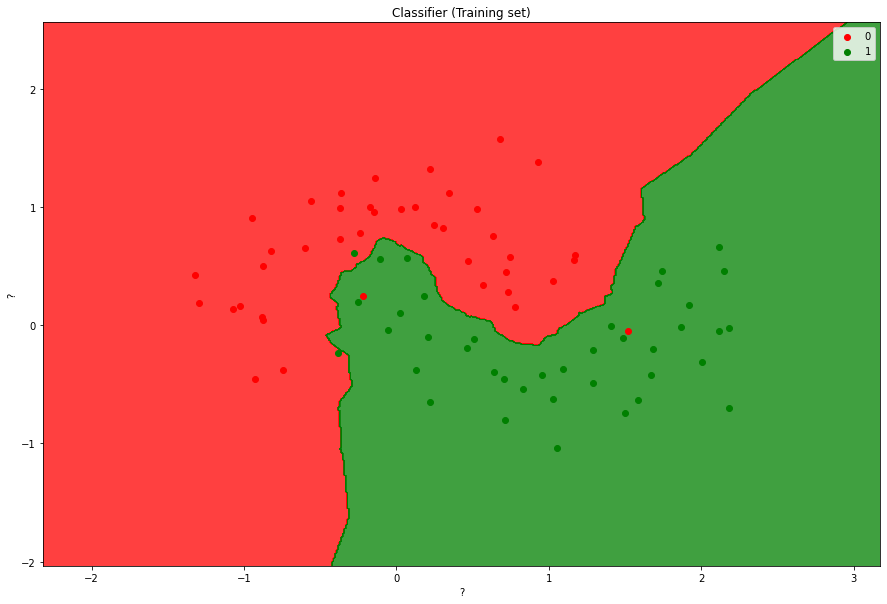

In [93]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
fig = plt.figure(figsize=(15,10))
plt.contourf(X1, X2, knn.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classifier (Training set)')
plt.xlabel('?')
plt.ylabel('?')
plt.legend()
plt.show()

Visualising the Test set results

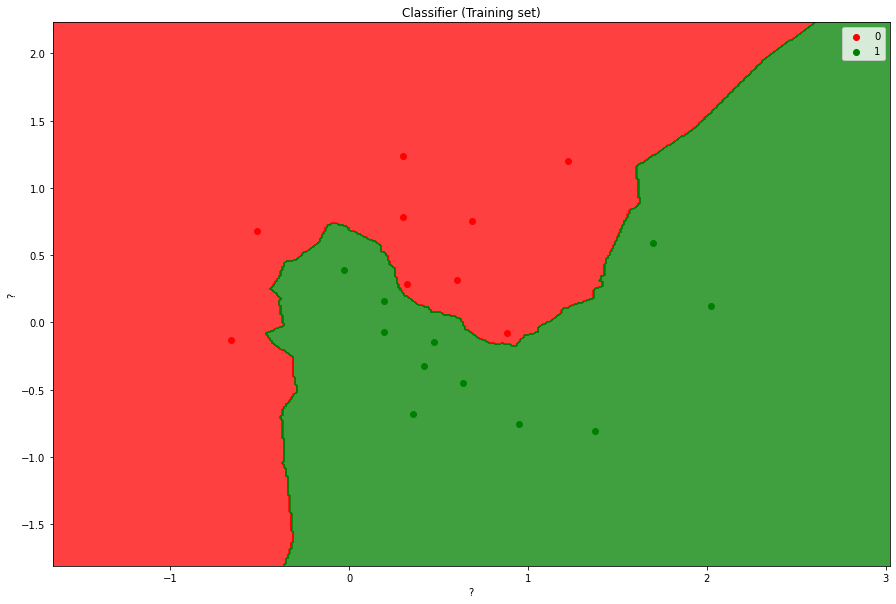

In [100]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_test[:, 0].min() - 1, stop = X_test[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_test[:, 1].min() - 1, stop = X_test[:, 1].max() + 1, step = 0.01))
fig = plt.figure(figsize=(15,10))
plt.contourf(X1, X2, knn.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_test)):
    plt.scatter(X_test[y_test == j, 0], X_test[y_test == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classifier (Training set)')
plt.xlabel('?')
plt.ylabel('?')
plt.legend()
plt.show()

Standardization of the dataset

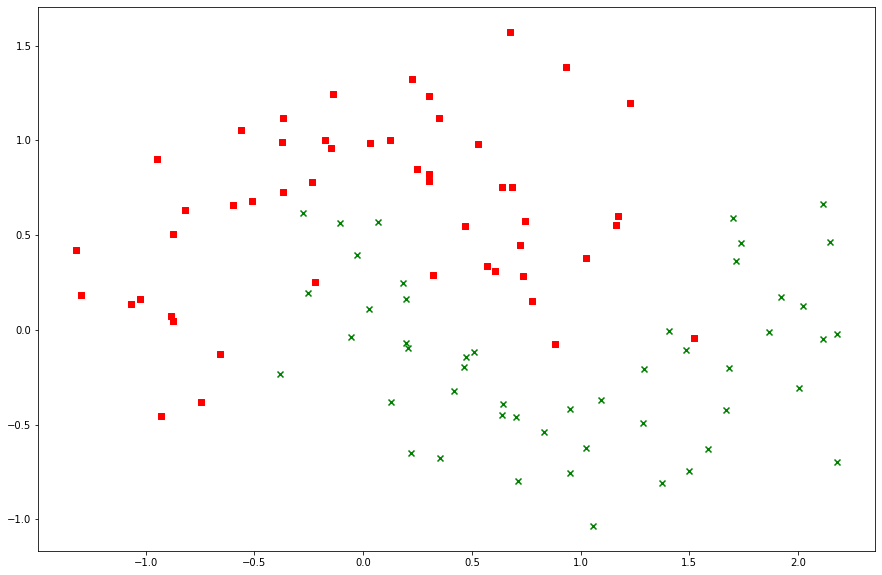

In [99]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

fig = plt.figure(figsize=(15,10))
markers = ('s', 'x')
colors = ('red', 'green')
cmap = ListedColormap(colors[:len(np.unique(y_test))])
for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
               c=cmap(idx), marker=markers[idx], label=cl)

**SVM**

In [49]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0, probability=True)
svm.fit(X_train, y_train)

print('The accuracy of the svm classifier on training data is {:.2f} out of 1'.format(svm.score(X_train, y_train)))

print('The accuracy of the svm classifier on test data is {:.2f} out of 1'.format(svm.score(X_test, y_test)))

The accuracy of the svm classifier on training data is 0.82 out of 1
The accuracy of the svm classifier on test data is 0.85 out of 1


In [50]:
import plotly.express as px
# Fit the model on training data, predict on test data

svm.fit(X_train, y_train)
y_score = svm.predict_proba(X_test)[:,1]

fig = px.scatter(
    X_test, x=0, y=1,
    color=y_score, color_continuous_scale='RdBu',
    symbol=y_test, symbol_map={'0': 'square-dot', '1': 'circle-dot'},
    labels={'symbol': 'label', 'color': 'score of <br>first class'}
)
fig.update_traces(marker_size=12, marker_line_width=1.5)
fig.update_layout(legend_orientation='h')
fig.show()

Probability Estimates

In [51]:
mesh_size = .02
margin = 0.25

# Create a mesh grid on which we will run our model
x_min, x_max = X[:, 0].min() - margin, X[:, 0].max() + margin
y_min, y_max = X[:, 1].min() - margin, X[:, 1].max() + margin
xrange = np.arange(x_min, x_max, mesh_size)
yrange = np.arange(y_min, y_max, mesh_size)
xx, yy = np.meshgrid(xrange, yrange)

# Create classifier, run predictions on grid
#clf = KNeighborsClassifier(33, weights='uniform')
svm.fit(X, y)
Z = svm.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)


# Plot the figure
fig = go.Figure(data=[
    go.Contour(
        x=xrange,
        y=yrange,
        z=Z,
        colorscale='RdBu'
    )
])
fig.show()

Compare the confidence of our model with the true labels.

In [52]:
mesh_size = .02
margin = 0.25

# Load and split data
X, y = make_moons(noise=0.3, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(
    X, y.astype(str), test_size=0.2, random_state=0)

# Create a mesh grid on which we will run our model
x_min, x_max = X[:, 0].min() - margin, X[:, 0].max() + margin
y_min, y_max = X[:, 1].min() - margin, X[:, 1].max() + margin
xrange = np.arange(x_min, x_max, mesh_size)
yrange = np.arange(y_min, y_max, mesh_size)
xx, yy = np.meshgrid(xrange, yrange)

# Create classifier, run predictions on grid
svm.fit(X, y)
Z = svm.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

trace_specs = [
    [X_train, y_train, '0', 'Train', 'square'],
    [X_train, y_train, '1', 'Train', 'circle'],
    [X_test, y_test, '0', 'Test', 'square-dot'],
    [X_test, y_test, '1', 'Test', 'circle-dot']
]

fig = go.Figure(data=[
    go.Scatter(
        x=X[y==label, 0], y=X[y==label, 1],
        name=f'{split} Split, Label {label}',
        mode='markers', marker_symbol=marker
    )
    for X, y, label, split, marker in trace_specs
])
fig.update_traces(
    marker_size=12, marker_line_width=1.5,
    marker_color="lightyellow"
)

fig.add_trace(
    go.Contour(
        x=xrange,
        y=yrange,
        z=Z,
        showscale=False,
        colorscale='RdBu',
        opacity=0.4,
        name='Score',
        hoverinfo='skip'
    )
)
fig.show()

In [53]:
import warnings


def versiontuple(v):
    return tuple(map(int, (v.split("."))))


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

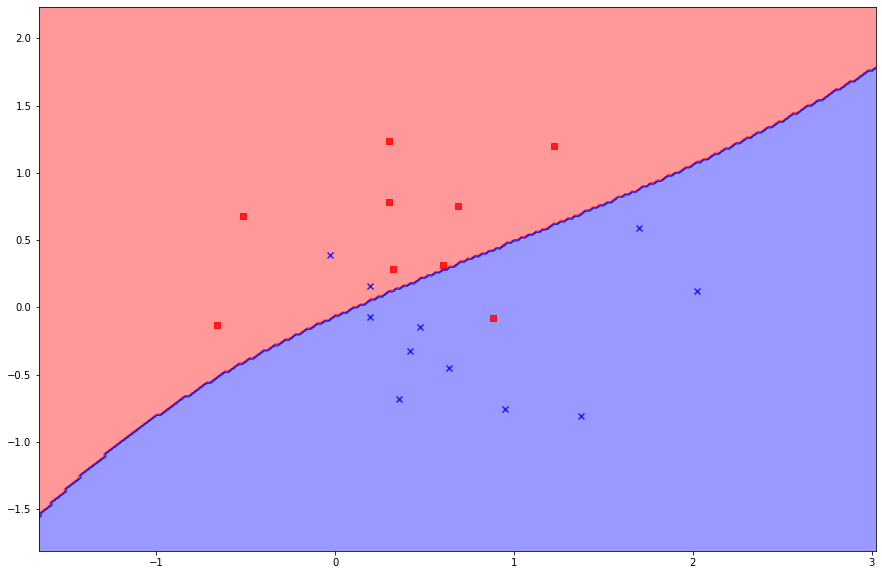

In [98]:
fig = plt.figure(figsize=(15,10))
plot_decision_regions(X_test, y_test, svm)

**Decision Tree** 

In [96]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [97]:
dt = DecisionTreeClassifier()
model = dt.fit(X, y)

print('The accuracy of the knn classifier is {:.2f} out of 1 on training data'.format(dt.score(X_train, y_train)))
print('The accuracy of the knn classifier is {:.2f} out of 1 on test data'.format(dt.score(X_test, y_test)))

The accuracy of the knn classifier is 0.00 out of 1 on training data
The accuracy of the knn classifier is 0.00 out of 1 on test data


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:217: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:217: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



**Text Representation**

In [91]:
text_representation = tree.export_text(dt)
print(text_representation)

|--- feature_1 <= 0.02
|   |--- feature_0 <= -0.52
|   |   |--- class: 0
|   |--- feature_0 >  -0.52
|   |   |--- feature_1 <= -0.09
|   |   |   |--- class: 1
|   |   |--- feature_1 >  -0.09
|   |   |   |--- feature_1 <= -0.07
|   |   |   |   |--- class: 0
|   |   |   |--- feature_1 >  -0.07
|   |   |   |   |--- feature_1 <= -0.04
|   |   |   |   |   |--- feature_1 <= -0.05
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_1 >  -0.05
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_1 >  -0.04
|   |   |   |   |   |--- class: 1
|--- feature_1 >  0.02
|   |--- feature_0 <= 1.46
|   |   |--- feature_1 <= 0.62
|   |   |   |--- feature_0 <= 0.26
|   |   |   |   |--- feature_0 <= -0.58
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_0 >  -0.58
|   |   |   |   |   |--- feature_0 <= -0.16
|   |   |   |   |   |   |--- feature_0 <= -0.24
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_0 >  -0.24
|   |   |   |   |

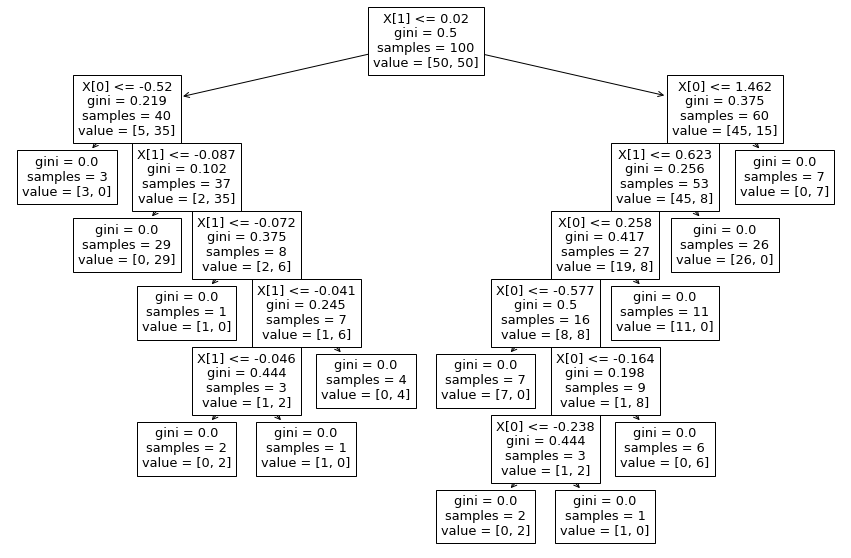

In [94]:
import sys
fig = plt.figure(figsize=(15,10))
tree.plot_tree(dt)
sys.stdout.flush()
